# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from transformers import AdamW
from torch.utils.data import DataLoader, Dataset
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tqdm import tqdm
import os
import random
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nisha/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load data
data1 = pd.read_csv("data/book3.csv")
data2 = pd.read_json("data/questions_with_chapters.json")
data3 = pd.read_json("data/questions.json")

In [3]:
data1

,Topic,Question
0,Linear Equations,Find all solutions to the following system of ...
1,Linear Equations,Find a row-reduced echelon matrix which is row...
2,Linear Equations,Let \[A=\begin{bmatrix}1&2&1&0\\ -1&0&3&5\\ 1&...
3,Linear Equations,"Do Exercise 1, but with \[A=\begin{bmatrix}2&\..."
4,Linear Equations,For each of the two matrices \[\begin{bmatrix}...
...,...,...
114,Bilinear Forms,Let \(X\) be an \(n\times 1\) matrix over \(C\...
115,Bilinear Forms,Let \(V\) be the space of all \(n\times 1\) ma...
116,Bilinear Forms,Let \(S\) be any set of \(n\times n\) matrices...
117,Bilinear Forms,"Let \(F\) be a subfield of \(C\), \(V\) a fini..."


In [4]:
data2

,chapter,question
0,MatricesandGaussianElimination,"For the equations x+y = 4, 2x−2y = 4, draw the..."
1,MatricesandGaussianElimination,Solve to find a combination of the columns tha...
2,MatricesandGaussianElimination,Describe the intersection of the three planes ...
3,MatricesandGaussianElimination,Sketch these three lines and decide if the equ...
4,MatricesandGaussianElimination,Find two points on the line of intersection of...
...,...,...
1960,LinearProgrammingandGameTheory,9. T hietn rescetiocno lousfmp nai cse sth teh...
1961,LinearProgrammingandGameTheory,2. 3 == 2+2 . + 1 1 1 1 - 1 - 1 1- -11 . - 1- ...
1962,LinearProgrammingandGameTheory,1. (Aids i agloiblnze;aa) o (egievncetors and ...
1963,LinearProgrammingandGameTheory,3. I B+ sinBceO A.sl o I +t .J eBt == 0 1 0 ==...


In [5]:
# rename columns
data2.rename(columns={"chapter": "Topic", "question": "Question"}, inplace=True)
data2

,Topic,Question
0,MatricesandGaussianElimination,"For the equations x+y = 4, 2x−2y = 4, draw the..."
1,MatricesandGaussianElimination,Solve to find a combination of the columns tha...
2,MatricesandGaussianElimination,Describe the intersection of the three planes ...
3,MatricesandGaussianElimination,Sketch these three lines and decide if the equ...
4,MatricesandGaussianElimination,Find two points on the line of intersection of...
...,...,...
1960,LinearProgrammingandGameTheory,9. T hietn rescetiocno lousfmp nai cse sth teh...
1961,LinearProgrammingandGameTheory,2. 3 == 2+2 . + 1 1 1 1 - 1 - 1 1- -11 . - 1- ...
1962,LinearProgrammingandGameTheory,1. (Aids i agloiblnze;aa) o (egievncetors and ...
1963,LinearProgrammingandGameTheory,3. I B+ sinBceO A.sl o I +t .J eBt == 0 1 0 ==...


In [6]:
data3

,chapter,question_latex,equations
0,Computations with Matrices,"For an orthogonal matrix \( Q \), show that \(...",[]
1,Computations with Matrices,Which “famous” inequality gives \( \| (A+B)x \...,[]
2,Computations with Matrices,Explain why \( \|ABx\| \leq \|A\| \|B\| \|x\| ...,[]
3,Computations with Matrices,For the positive definite matrix \( A = \begin...,[]
4,Computations with Matrices,Show that if \( \lambda \) is any eigenvalue o...,[]
...,...,...,...
3187,Vector Spaces,What is a basis for the row space of $A$?,[A]
3188,Vector Spaces,"True or false: Rows 1, 2, 3 of $A$ are linearl...",[A]
3189,Vector Spaces,What is a basis for the column space of $A$?,[A]
3190,Vector Spaces,What is the dimension of the left nullspace of...,[A]


In [7]:
data3.rename(columns={"chapter": "Topic", "question_latex": "Question"}, inplace=True)
data3

,Topic,Question,equations
0,Computations with Matrices,"For an orthogonal matrix \( Q \), show that \(...",[]
1,Computations with Matrices,Which “famous” inequality gives \( \| (A+B)x \...,[]
2,Computations with Matrices,Explain why \( \|ABx\| \leq \|A\| \|B\| \|x\| ...,[]
3,Computations with Matrices,For the positive definite matrix \( A = \begin...,[]
4,Computations with Matrices,Show that if \( \lambda \) is any eigenvalue o...,[]
...,...,...,...
3187,Vector Spaces,What is a basis for the row space of $A$?,[A]
3188,Vector Spaces,"True or false: Rows 1, 2, 3 of $A$ are linearl...",[A]
3189,Vector Spaces,What is a basis for the column space of $A$?,[A]
3190,Vector Spaces,What is the dimension of the left nullspace of...,[A]


In [ ]:
# each dataset has to be cleaned and combined
data1_1 = data1.dropna()
data1_1 = data1_1.drop_duplicates()
data1_1 = data1_1[["Question", "Topic"]]
data1_1["Question"] = data1_1["Question"].apply(lambda x: x.lower())
data1_1["Topic"] = data1_1["Topic"].apply(lambda x: x.lower())
data1_1["Topic"] = data1_1["Topic"].apply(lambda x: re.sub(r"\s*", "", x))
data1_1["Topic"] = data1_1["Topic"].apply(lambda x: x.strip())

data2_1 = data2.dropna()
data2_1 = data2_1.drop_duplicates()
data2_1 = data2_1[["Question", "Topic"]]
data2_1["Question"] = data2_1["Question"].apply(lambda x: x.lower())
data2_1["Topic"] = data2_1["Topic"].apply(lambda x: x.lower())
data2_1["Topic"] = data2_1["Topic"].apply(lambda x: re.sub(r"\s*", "", x))
data2_1["Topic"] = data2_1["Topic"].apply(lambda x: x.strip())

data3_1 = data3.dropna()
data3_1 = data3_1[["Question", "Topic"]].drop_duplicates()
data3_1 = data3_1[["Question", "Topic"]]
data3_1["Question"] = data3_1["Question"].apply(lambda x: x.lower())
data3_1["Topic"] = data3_1["Topic"].apply(lambda x: x.lower())
data3_1["Topic"] = data3_1["Topic"].apply(lambda x: re.sub(r"\s*", "", x))
data3_1["Topic"] = data3_1["Topic"].apply(lambda x: x.strip())

In [10]:
data = pd.concat([data1_1, data2_1, data3_1], axis=0)
data = data.drop_duplicates()
data = data.dropna()
data = data.reset_index(drop=True)

In [11]:
data

,Question,Topic
0,find all solutions to the following system of ...,linearequations
1,find a row-reduced echelon matrix which is row...,linearequations
2,let \[a=\begin{bmatrix}1&2&1&0\\ -1&0&3&5\\ 1&...,linearequations
3,"do exercise 1, but with \[a=\begin{bmatrix}2&\...",linearequations
4,for each of the two matrices \[\begin{bmatrix}...,linearequations
...,...,...
5172,what is a basis for the row space of $a$?,vectorspaces
5173,"true or false: rows 1, 2, 3 of $a$ are linearl...",vectorspaces
5174,what is a basis for the column space of $a$?,vectorspaces
5175,what is the dimension of the left nullspace of...,vectorspaces


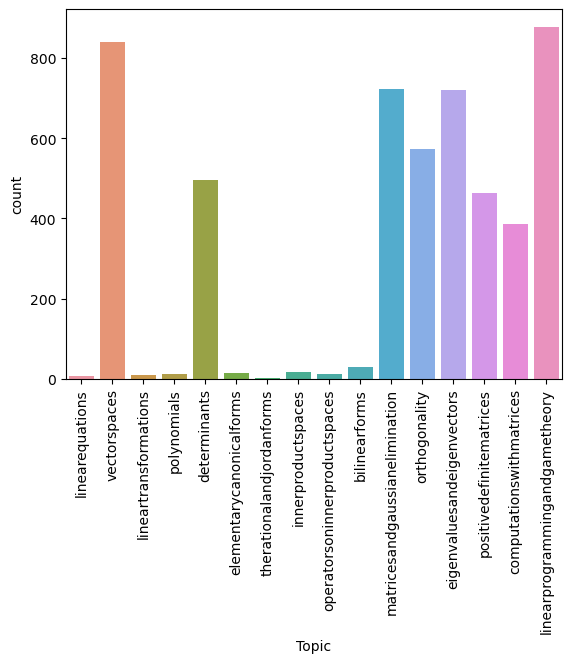

In [12]:
# check for class imbalance
sns.countplot(x=data["Topic"])
plt.xticks(rotation=90)
plt.show()

In [14]:
data['Topic'].unique()

array(['linearequations', 'vectorspaces', 'lineartransformations',
       'polynomials', 'determinants', 'elementarycanonicalforms',
       'therationalandjordanforms', 'innerproductspaces',
       'operatorsoninnerproductspaces', 'bilinearforms',
       'matricesandgaussianelimination', 'orthogonality',
       'eigenvaluesandeigenvectors', 'positivedefinitematrices',
       'computationswithmatrices', 'linearprogrammingandgametheory'],
      dtype=object)

In [15]:
# the topics have no spaces between words. We need to add spaces between words
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"linearequations", "linear equations", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"vectorspaces", "vector spaces", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"lineartransformations", "linear transformations", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"polynomials", "polynomials", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"elementarycanonicalforms", "elementary canonical forms", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"therationalandjordanforms", "the rational and jordan forms", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"innerproductspaces", "inner product spaces", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"operatorsoninnerproductspaces", "operators on inner product spaces", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"bilinearforms", "bilinear forms", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"matricesandgaussianelimination", "matrices and gaussian elimination", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"orthogonality", "orthogonality", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"eigenvaluesandeigenvectors", "eigenvalues and eigenvectors", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"positivedefinitematrices", "positive definite matrices", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"computationswithmatrices", "computations with matrices", x))
data["Topic"] = data["Topic"].apply(lambda x: re.sub(r"linearprogrammingandgametheory", "linear programming and game theory", x))

In [16]:
data

,Question,Topic
0,find all solutions to the following system of ...,linear equations
1,find a row-reduced echelon matrix which is row...,linear equations
2,let \[a=\begin{bmatrix}1&2&1&0\\ -1&0&3&5\\ 1&...,linear equations
3,"do exercise 1, but with \[a=\begin{bmatrix}2&\...",linear equations
4,for each of the two matrices \[\begin{bmatrix}...,linear equations
...,...,...
5172,what is a basis for the row space of $a$?,vector spaces
5173,"true or false: rows 1, 2, 3 of $a$ are linearl...",vector spaces
5174,what is a basis for the column space of $a$?,vector spaces
5175,what is the dimension of the left nullspace of...,vector spaces


In [17]:
data.to_csv("data/combined.csv", index=False)

---